<a href="https://colab.research.google.com/github/Shanz1465/Sesi-n-6-Python-Machine-Learning-Redes-neuronales/blob/main/Clase_6_y_7_Python_Con_Datos_Atmosfericos_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
# Carga de datos
from google.colab import files



In [37]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DatosAzcapo.txt", sep=',', header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52179 entries, 0 to 52178
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       52179 non-null  object 
 1   1       52179 non-null  object 
 2   2       52179 non-null  float64
 3   3       52179 non-null  float64
 4   4       52179 non-null  float64
 5   5       52179 non-null  float64
 6   6       52179 non-null  float64
 7   7       52179 non-null  float64
 8   8       52179 non-null  float64
 9   9       52179 non-null  float64
 10  10      52179 non-null  float64
 11  11      52179 non-null  float64
 12  12      52179 non-null  float64
dtypes: float64(11), object(2)
memory usage: 5.2+ MB


In [38]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,4/4/2024 12:00:00 AM,4/4/2024 6:00:00 AM,28.692070,14.742066,13.950004,23.128830,19.350910,77.827011,28.035599,25.874756,33.960640,11.665325,5.025064
1,4/4/2024 12:01:00 AM,4/4/2024 6:01:00 AM,32.022658,14.771019,17.251640,23.148970,19.340763,77.817986,27.919699,25.910034,33.966431,11.671605,5.068029
2,4/4/2024 12:02:00 AM,4/4/2024 6:02:00 AM,32.219123,14.717249,17.501873,23.169109,19.335342,77.820869,27.938000,25.910950,33.988586,11.663702,5.003208
3,4/4/2024 12:03:00 AM,4/4/2024 6:03:00 AM,31.586301,14.659344,16.926957,23.169109,19.330561,77.814812,27.956299,25.925995,33.997185,11.670901,4.931069
4,4/4/2024 12:04:00 AM,4/4/2024 6:04:00 AM,32.534500,14.676922,17.857577,23.199320,19.308531,77.830132,27.956299,25.948059,34.013283,11.678738,5.000206


In [39]:
df['fechas']=pd.to_datetime(df[0])
df=df.set_index('fechas')

<ipython-input-39-f5f18913dd5c>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['fechas']=pd.to_datetime(df[0])


In [40]:
PM10  = df[2]
PM25  = df[3]
PMmix = df[4]
temp  = df[6]
Pres  = df[7]
RH    = df[8]


In [41]:
variable=["$PM_{10}$",'$PM_{2.5}$', '$PM_{mix}$', 'T', 'P', 'RH',]
colors= ['black','red', 'blue', 'green', 'orange', 'brown']

In [42]:
def plot_var(var,index,lim_min, lim_max):
  plt.figure(figsize=(15,2))
  plt.plot(var.iloc[lim_min:lim_max], color=colors[index], label=variable[index])
  plt.xlabel('Tiempo', fontsize=12)
  plt.ylabel(f'{variable[index]}', fontsize=12)
  plt.legend()
  plt.grid(True)
  plt.show()


52179


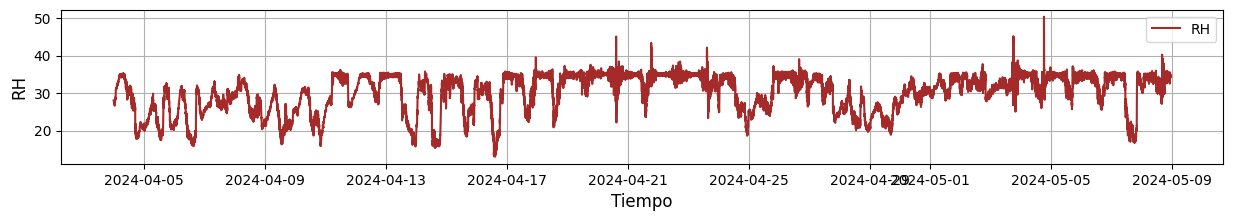

In [43]:
print(len(df))
index=5
plot_var(RH, index,0,50000)

In [44]:
# Coeficiente de asimetria de Fisher

df.skew(numeric_only=True)

,0
2,2.627921
3,0.689481
4,3.799422
5,1.763857
6,0.178861
7,0.272153
8,-0.895409
9,0.437827
10,1.702012
11,0.561093


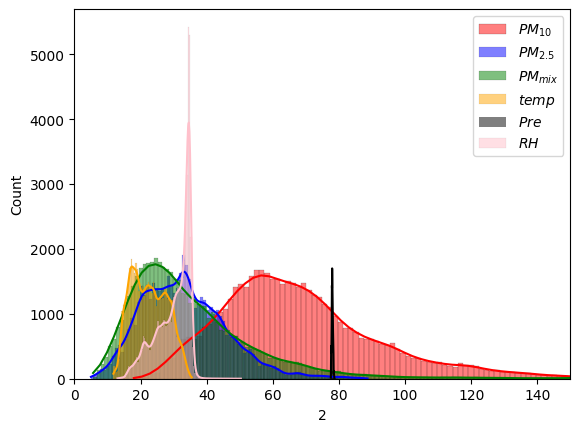

In [45]:
sns.histplot(PM10, color='red', label='$PM_{10}$',kde=True) #kde=True añade un curva de densidad
sns.histplot(PM25, color='blue', label='$PM_{2.5}$',kde=True)
sns.histplot(PMmix, color='green', label='$PM_{mix}$',kde=True)
sns.histplot(temp, color='orange', label='$temp$',kde=True)
sns.histplot(Pres, color='black', label='$Pre$',kde=True)
sns.histplot(RH, color='pink', label='$RH$',kde=True)
plt.xlim(0,150)
plt.legend(loc='upper right')
plt.show()

In [46]:
df.kurt(numeric_only=True)

,0
2,17.602749
3,0.728258
4,28.249759
5,2.810165
6,-0.996193
7,-0.165019
8,-0.111215
9,6.155148
10,2.888641
11,46.158682


In [47]:
# calcular la correlación
correlation0 = df[3].corr(df[2], method='spearman')
correlation1 = df[3].corr(df[4], method='spearman')
correlation2 = df[3].corr(df[6], method='spearman')
correlation3 = df[3].corr(df[7], method='spearman')
correlation4 = df[3].corr(df[8], method='spearman')

print(f'Correlación PM2.5 y PM10: {correlation0}')
print(f'Correlación PM2.5 y PMmix: {correlation1}')
print(f'Correlación PM2.5 y temp: {correlation2}')
print(f'Correlación PM2.5 y Press: {correlation3}')
print(f'Correlación PM2.5 y RH: {correlation4}')


Correlación PM2.5 y PM10: 0.6628288269857316
Correlación PM2.5 y PMmix: 0.19378730709920722
Correlación PM2.5 y temp: 0.03153504569097056
Correlación PM2.5 y Press: 0.005900923429563776
Correlación PM2.5 y RH: 0.415282630428508


In [48]:
# Cargamos los datos que usaremos para el ejemplo

Data_in = np.column_stack([temp, Pres]) # para generar un modelo de prediccion de PM25; , PM10
Data_out = np.column_stack([PM25])
print(len(Data_in))
print(len(Data_out))

52179
52179


In [49]:
# Generacion de modelos de redes neuronales

Data_in.shape[1]

2

In [50]:
# crear modelo de Tensorflow
# definir el modelo secuencial
model= tf.keras.Sequential([
    tf.keras.layers.Dense(3, activation='linear', input_shape=(Data_in.shape[1],)),
    tf.keras.layers.Dense(1, activation= 'linear')
     ])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
# Resumen del modelo
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [52]:
# Division  de los conjuntos de datos

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Data_in, Data_out,test_size=0.2,random_state=42)

In [53]:
print(Data_in[:5])
print(X_train[:5])

[[19.35091019 77.82701111]
 [19.34076309 77.81798553]
 [19.33534241 77.82086945]
 [19.33056068 77.81481171]
 [19.30853081 77.83013153]]
[[24.13035774 77.91934967]
 [16.16941452 78.06840515]
 [27.22885513 77.9575119 ]
 [13.59325886 78.20446777]
 [23.71559715 78.21208191]]


In [54]:
train_split =int(0.7*len(Data_in))

print(train_split)

X_train, y_train = Data_in[0:train_split], Data_out[0:train_split]
X_test, y_test = Data_in[train_split:len(Data_in)], Data_out[train_split:len(Data_in)]

36525


In [55]:
print(Data_in[0:train_split])
X_train

[[19.35091019 77.82701111]
 [19.34076309 77.81798553]
 [19.33534241 77.82086945]
 ...
 [29.00280762 77.82491302]
 [29.18952942 77.82133484]
 [29.4770565  77.81024933]]


array([[19.35091019, 77.82701111],
       [19.34076309, 77.81798553],
       [19.33534241, 77.82086945],
       ...,
       [29.00280762, 77.82491302],
       [29.18952942, 77.82133484],
       [29.4770565 , 77.81024933]])

# Continuación Clase 7

In [56]:
# Compilar el modelo
model.compile(optimizer = 'adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=50, verbose=0)
#model.fit(X_train, y_train, epochs=100, batch_size=2)

In [57]:
# Se realiza la validación y predicciones
train_predictions = model.predict(X_train)
print(f'Reproducción de los datos de entrenamiento:\n{train_predictions}' )
#print(X_train)
test_predictions=model.predict(X_test)
print(f'Predicción de datos:\n {test_predictions}')

1142/1142 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Reproducción de los datos de entrenamiento:
[[29.969671]
 [29.966675]
 [29.96818 ]
 ...
 [29.355825]
 [29.342525]
 [29.319788]]
490/490 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Predicción de datos:
 [[29.32892 ]
 [29.3317  ]
 [29.33036 ]
 ...
 [29.517464]
 [29.538435]
 [29.539175]]


In [58]:
print(len(y_train))
print(len(train_predictions))

36525
36525


Evaluación del modelo


In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

### interpolación

mse = mean_squared_error(y_train, train_predictions)
mae = mean_absolute_error (y_train, train_predictions)
r2 = r2_score(y_train, train_predictions)
print('Metricas interpolación:')
print(f'MSE:{mse}')
#print(f'MAE:{mae}')
print(f'R^2:{r2}')
### extrapolación
mse = mean_squared_error(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)
print('Métricas Extrapolación:')
print(f'MSE:{mse}')
#print(f'MAE:{mae}')
print(f'R^2:{r2}')

Metricas interpolación:
MSE:132.42475964767877
R^2:0.0032489735672546205
Métricas Extrapolación:
MSE:279.0794427482169
R^2:-0.9676198045341675


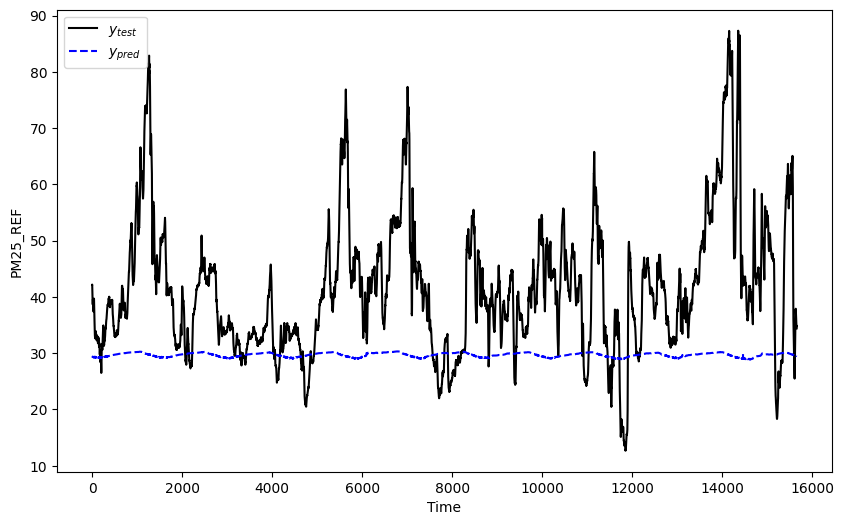

In [63]:
pl = np.vstack((y_train, y_test))
plt.figure(figsize=(10,6))
plt.plot(y_test,'-', color='black', label='$y_{test}$')
plt.plot(test_predictions,'--', color='blue', label='$y_{pred}$')
plt.xlabel('Time')
plt.ylabel('PM25_REF')
#plt.xlim(1000,2000)
plt.legend(loc='upper left')
plt.show()

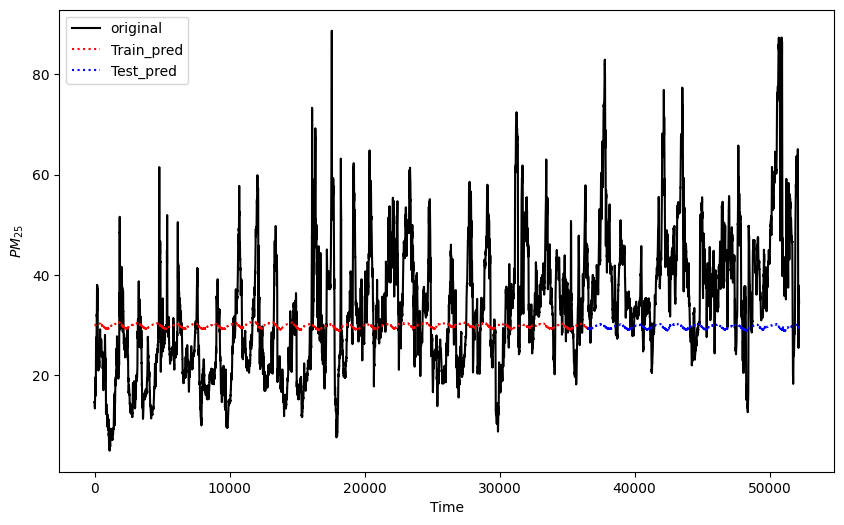

In [66]:
#############
pl1=np.vstack((train_predictions, test_predictions))
#############
plt.figure(figsize=(10,6))

plt.plot(Data_out, color='black', label='original')
plt.plot(range(len(y_train)), pl1[:len(y_train)], ':', color='red', label='Train_pred')
plt.plot(range(len(y_train), len(pl1)),  pl1[len(y_train):], ':', color='blue', label='Test_pred')
plt.xlabel('Time')
plt.ylabel('$PM_{25}$')
plt.legend(loc='upper left')
plt.show()

Usamos otro Optimizador

In [73]:
model= tf.keras.Sequential([
    tf.keras.layers.Dense(3, activation='linear', input_shape=(Data_in.shape[1],)),
    tf.keras.layers.Dense(1, activation='linear')
])

opt=tf.keras.optimizers.Adagrad(learning_rate=0.1)

model.compile(optimizer=opt, loss='mean_squared_error')

In [74]:
# Entrenar el nuevo modelo
model.fit(X_train, y_train, epochs=50, verbose=0)

In [75]:
# Hacer predicciones
train_predictions=model.predict(X_train)
print(f'Reproduccion de los datos de entrenamiento:\n{train_predictions}')
test_predictions = model.predict(X_test)
print(f'Validación del modelo:\n {test_predictions}')

1142/1142 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Reproduccion de los datos de entrenamiento:
[[29.912233]
 [29.909475]
 [29.911037]
 ...
 [29.151327]
 [29.135214]
 [29.108208]]
490/490 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Validación del modelo:
 [[29.11833 ]
 [29.12215 ]
 [29.119879]
 ...
 [29.327707]
 [29.35146 ]
 [29.35427 ]]


In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

### interpolación

mse = mean_squared_error(y_train, train_predictions)
mae = mean_absolute_error (y_train, train_predictions)
r2 = r2_score(y_train, train_predictions)
print('Metricas interpolación:')
print(f'MSE:{mse}')
#print(f'MAE:{mae}')
print(f'R^2:{r2}')
### extrapolación
mse = mean_squared_error(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)
print('Métricas Extrapolación:')
print(f'MSE:{mse}')
#print(f'MAE:{mae}')
print(f'R^2:{r2}')

Metricas interpolación:
MSE:132.41223890686683
R^2:0.0033432162246639363
Métricas Extrapolación:
MSE:282.0720008598869
R^2:-0.9887185158858796


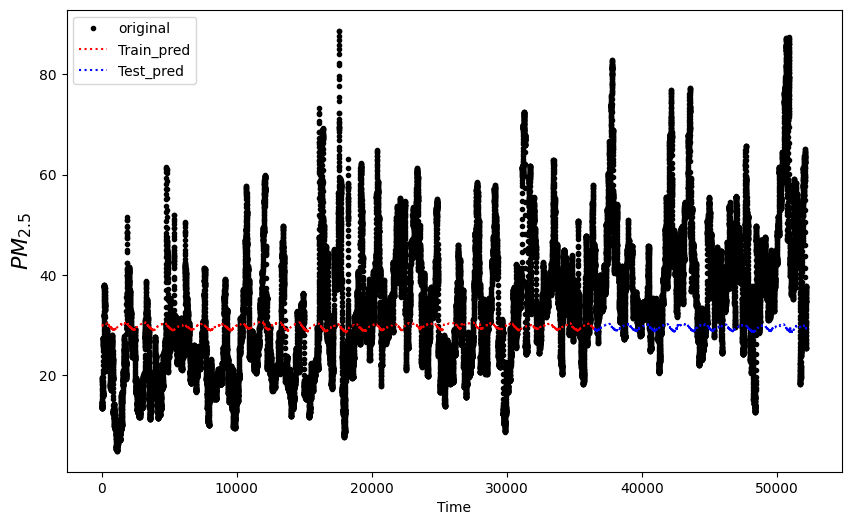

In [81]:
#############
pl1=np.vstack((train_predictions, test_predictions))
#############
plt.figure(figsize=(10,6))

plt.plot(Data_out, '.',color='black', label='original')
plt.plot(range(len(y_train)), pl1[:len(y_train)], ':', color='red', label='Train_pred')
plt.plot(range(len(y_train), len(pl1)),  pl1[len(y_train):], ':', color='blue', label='Test_pred')
plt.xlabel('Time')
plt.ylabel('$PM_{2.5}$', fontsize=16)
plt.legend(loc='upper left')
plt.show()

Usar las variables mejor correlacionadas para generar un modelo que reproduzca el comportamiento de las particulas $PM_{2.5}$

In [82]:
Data_in = np.column_stack([RH, PM10, PMmix])

In [83]:
train_split=int(0.7*len(Data_in))
print(train_split)
X_train, y_train = Data_in[0:train_split], Data_out[0:train_split]
X_test, y_test = Data_in[train_split:len(Data_in)], Data_out[train_split:len(Data_in)]

36525


In [84]:
model= tf.keras.Sequential([
    tf.keras.layers.Dense(3, activation='linear', input_shape=(Data_in.shape[1],)),
    tf.keras.layers.Dense(1, activation='linear')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [85]:
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=50, verbose=0)

In [86]:
# Hacer predicciones
train_predictions=model.predict(X_train)
print(f'Reproduccion de los datos de entrenamiento:\n{train_predictions}')
test_predictions = model.predict(X_test)
print(f'Validación del modelo:\n {test_predictions}')

1142/1142 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Reproduccion de los datos de entrenamiento:
[[14.751128]
 [14.77927 ]
 [14.725433]
 ...
 [42.08639 ]
 [42.171314]
 [42.189014]]
490/490 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Validación del modelo:
 [[42.150272]
 [42.206196]
 [42.08878 ]
 ...
 [34.851177]
 [34.58805 ]
 [34.423344]]


In [87]:
### interpolación

mse = mean_squared_error(y_train, train_predictions)
mae = mean_absolute_error (y_train, train_predictions)
r2 = r2_score(y_train, train_predictions)
print('Metricas interpolación:')
print(f'MSE:{mse}')
#print(f'MAE:{mae}')
print(f'R^2:{r2}')
### extrapolación
mse = mean_squared_error(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)
print('Métricas Extrapolación:')
print(f'MSE:{mse}')
#print(f'MAE:{mae}')
print(f'R^2:{r2}')

Metricas interpolación:
MSE:0.0032366733112106365
R^2:0.9999756378078105
Métricas Extrapolación:
MSE:0.002494904213435796
R^2:0.9999824099443068


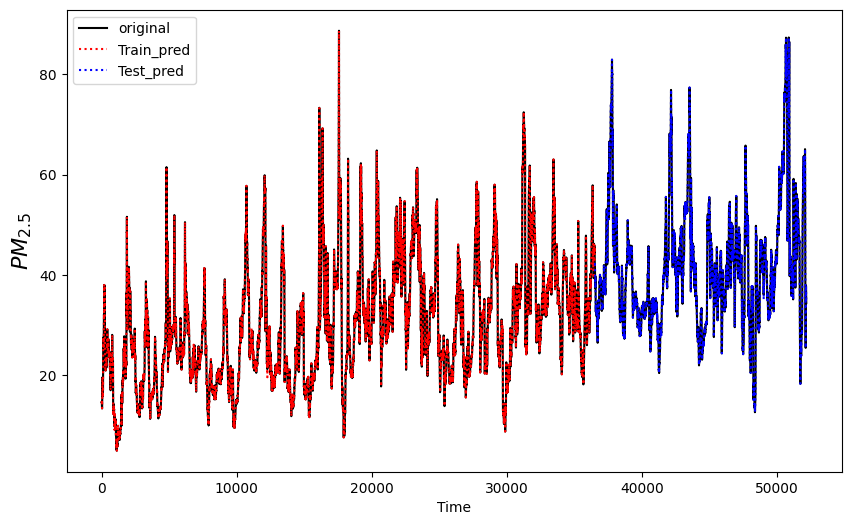

In [88]:
#############
pl1=np.vstack((train_predictions, test_predictions))
#############
plt.figure(figsize=(10,6))

plt.plot(Data_out,color='black', label='original')
plt.plot(range(len(y_train)), pl1[:len(y_train)], ':', color='red', label='Train_pred')
plt.plot(range(len(y_train), len(pl1)),  pl1[len(y_train):], ':', color='blue', label='Test_pred')
plt.xlabel('Time')
plt.ylabel('$PM_{2.5}$', fontsize=16)
plt.legend(loc='upper left')
plt.show()

Time Split series

In [89]:
Data_in =np.column_stack([RH, PM10, PMmix])

In [94]:
K_folds = 10
Fold_len = len(Data_in)/K_folds
Folds = []
sets  = []
for k in range (K_folds):
  sets.append([round(k*Fold_len), round((k+1)*Fold_len)])
  Folds.append( Data_in[round(k*Fold_len):round((k+1)*Fold_len)])

sets.append([len(Data_in),0])
sets = np.array(sets)

print(sets)

[[    0  5218]
 [ 5218 10436]
 [10436 15654]
 [15654 20872]
 [20872 26090]
 [26090 31307]
 [31307 36525]
 [36525 41743]
 [41743 46961]
 [46961 52179]
 [52179     0]]


In [95]:
def Set(i, Data_in, Data_out,porcentaje):
  train_split = int(porcentaje * len (Data))
  #print(train_split)

  X_train, y_train = Data_in[sets[0,0]:sets[i+1,0]], Data_out[sets[0,0]:sets[i+1,0]]
  X_test, y_test = Data_in[sets[i,1]:sets[i+1,1]], Data_out[sets[i,0]:sets[i+1,1]]
  pl1 = np.vstack((y_train, y_test))

  plt.plot(Data_out, '.', color='black')
  plt.plot(range(len(y_train)), pl1[:len(y_train)], '--', color='red', label='Train')
  plt.plot(range(len(y_test)), len(pl1), pl1[len(y_test):], '--', color='blue', label='Test')

  #plt.plot(Xtrain[:,1], '--', color='red')

  plt.legend()
  plt.show()

In [110]:
def Set(i, Data_in, Data_out,porcentaje, flag):
  if i>= len(sets) - 1:
   raise ValueError("El valor de 'i' es demasido grande para el numero de conjunto")

  # Determinar los indices de entrenamiento y prueba
  train_start, train_end = sets[0,0], sets[i, 1]
  test_start, test_end = sets[i,1], sets[i+ 1, 1]

  #Dividir los datos en conjuntos de entrenamiento y prueba
  X_train, y_train= Data_in[train_start:train_end], Data_out[train_start:train_end]
  X_test, y_test= Data_in[test_start:test_end], Data_out[test_start:test_end]

  # Crear un arreglo para graficar
  train_indices =np.arange(train_start, train_end)
  test_indices =np.arange(test_start, test_end)

  #Graficar datos
  if flag == True:
   plt.plot(Data_out, '.', color='black', label='Datos originales')
   plt.plot(train_indices, y_train, '--', color='red', label='Train')
   plt.plot(test_indices, y_test, '--', color='blue', label='Test')

  plt.legend()
  plt.show()
  return X_train, y_train, X_test, y_test


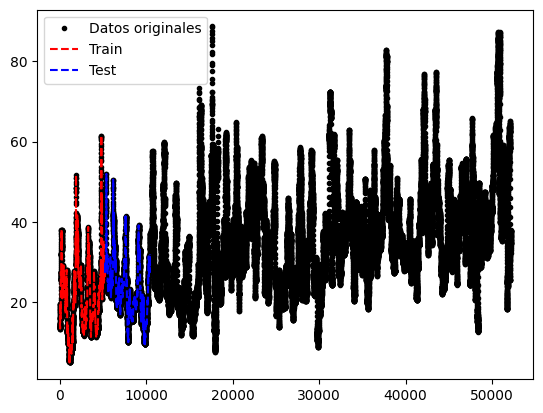

164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


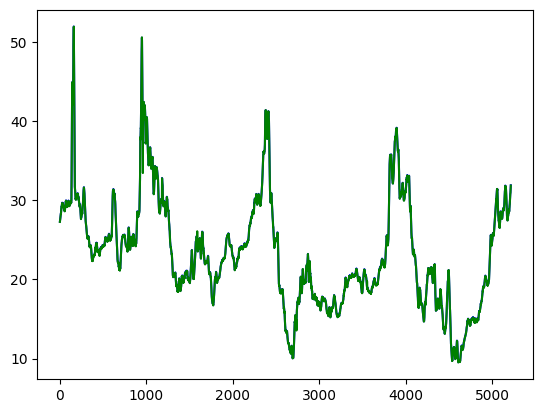

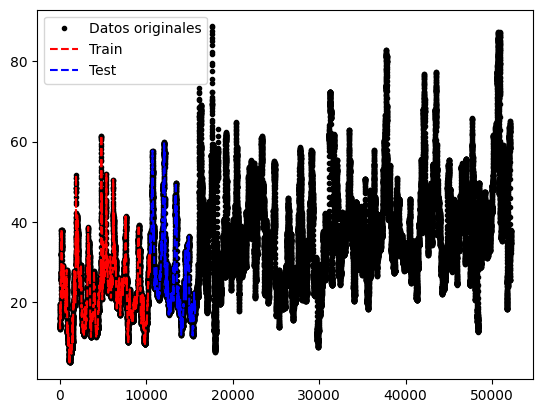

164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


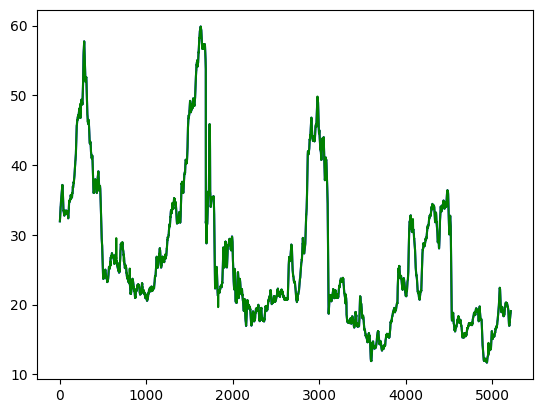

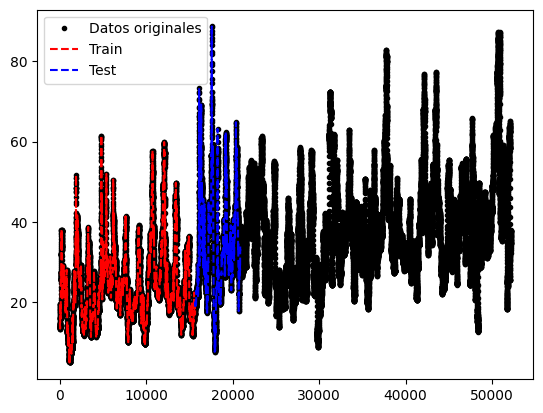

164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


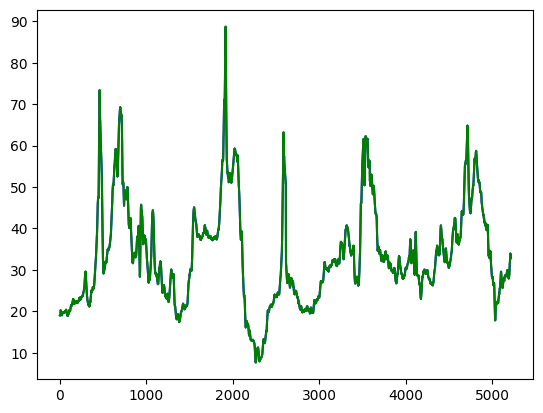

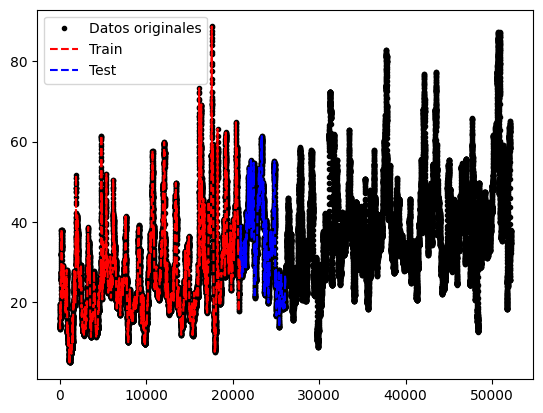

164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


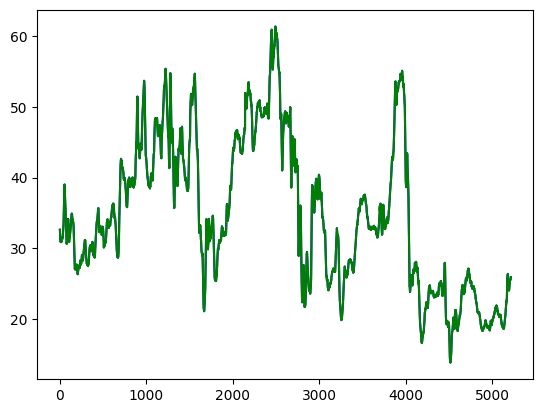

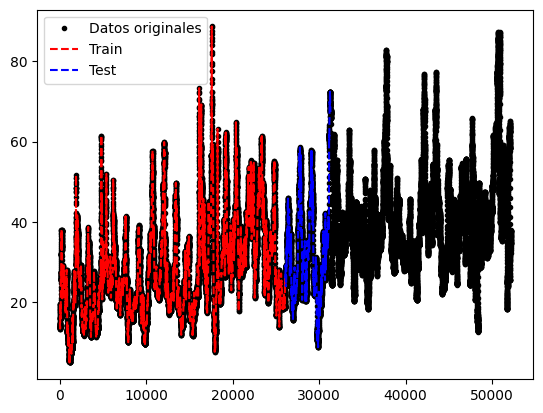

164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


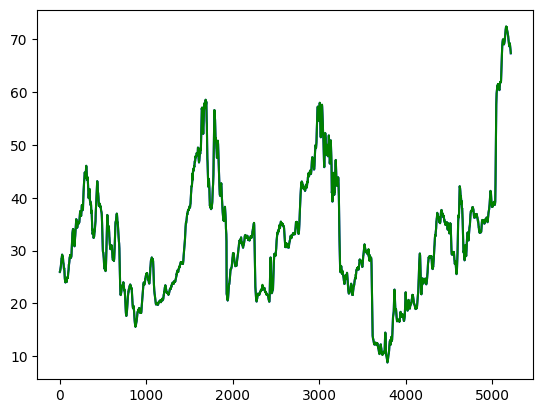

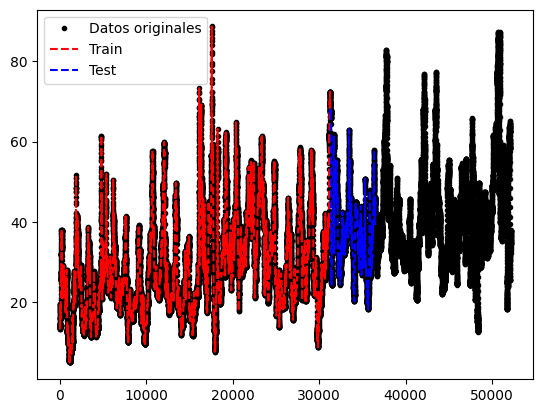

164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


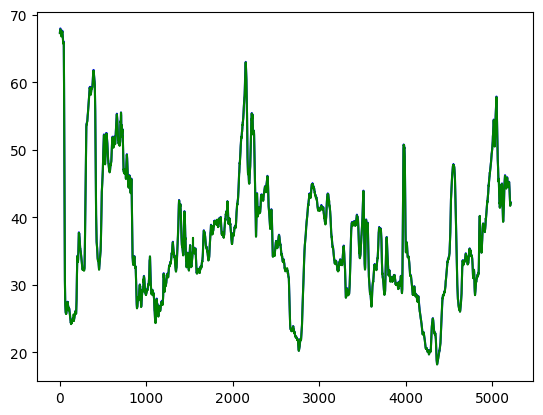

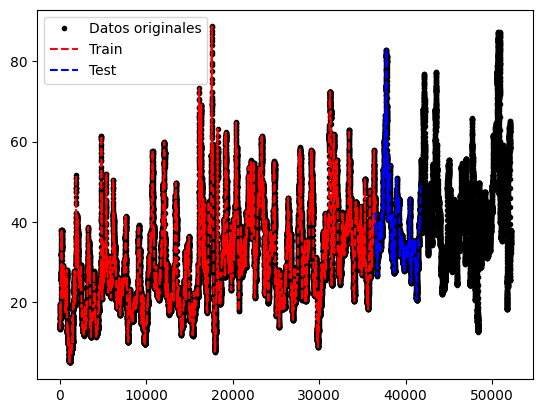

164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


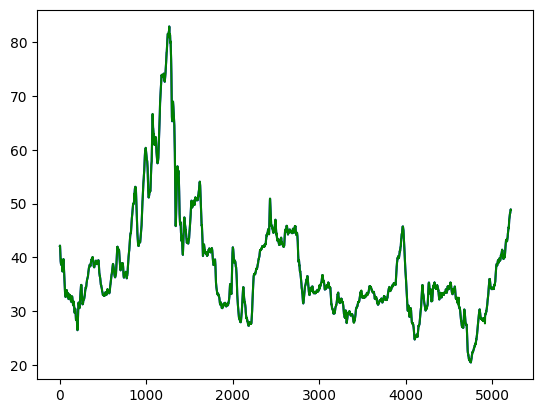

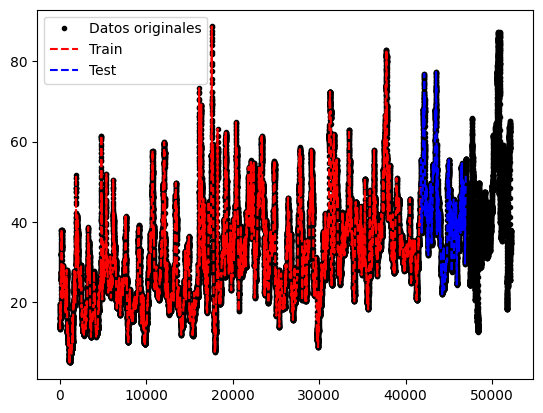

164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


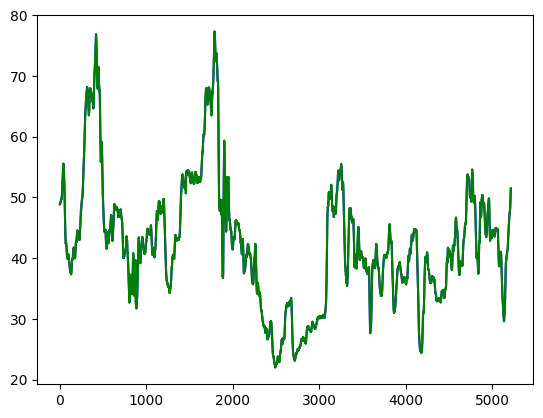

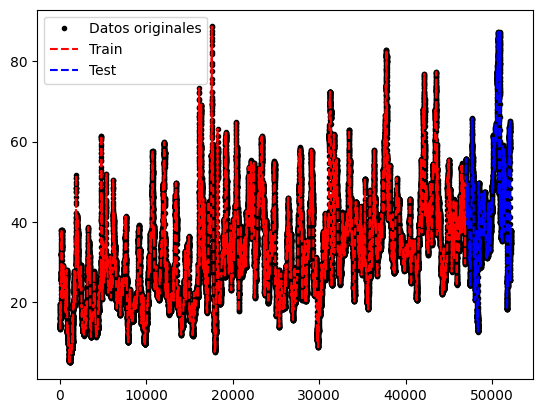

164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


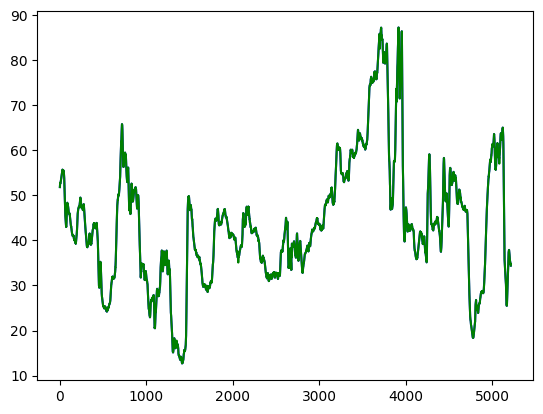

In [112]:
MSE = []
R2 =[]

for i in range(len(sets)-2):
  #print(sets[i+1,0], sets[K_folds-1,1])
  X_train, y_train, X_test, y_test = Set(i, Data_in, Data_out, 0.7, True)
  model.fit(X_train, y_train, epochs=50, verbose=0)
  test_predictions = model.predict(X_test)
  MSE.append(mean_squared_error(y_test, test_predictions))
  rr = r2_score(y_test, test_predictions)
  R2.append(rr)
  plt.plot(y_test, color='blue')
  plt.plot(test_predictions, color='green')
  plt.show()



In [113]:
print('MSE promedio:', np.mean(MSE))
print('R2 promedio:', np.mean(R2))
#plt.plot(R2)

MSE promedio: 0.0035869941484446793
R2 promedio: 0.9999563684792818
